<a href="https://colab.research.google.com/github/mkarthiga22/Heroko-demo/blob/main/LOAN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Read the dataset

In [2]:
loans = pd.read_csv("/content/sample_data/loan.csv",low_memory=True)
loans.head()
loans.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(39717, 111)

Feature Extraction


In [3]:
column_list = ['emp_title ',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'addr_state',
'purpose',
'loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'int_rate',
'loan_status',
'grade',
'sub_grade',
'dti',
'issue_d',
'term',
'installment'
];

column_removal_list = [x for x in loans.columns if x not in column_list]
#column_removal_list
for col in column_removal_list:
    loans = loans.drop(col, axis=1)


Removing "Current" from loan_status since we are not considering this


In [4]:
loans = loans[loans.loan_status != 'Current']
loans.shape

(38577, 17)

# percentage of missing values in each column

In [5]:
round(100*(loans.isnull().sum()/len(loans.index)), 2)

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.68
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
dtype: float64

We have to extract the interger values from string so as to compute the model

# The column emp_length is character type, let's convert it to float

In [6]:
#Extracting integer from String
loans['emp_length'] = loans['emp_length'].apply(lambda x : ("".join(filter(str.isdigit, str(x)))))
#Filtering the rows where experience is NA
loans = loans[loans['emp_length']!='']
loans.shape

(37544, 17)

In [19]:
loans['loan_status'] = loans['loan_status'].astype('category')
loans['loan_status'].value_counts()

Fully Paid     28074
Charged Off     4788
Name: loan_status, dtype: int64

In [7]:
# Loan to annual income variable
import datetime
loans['l_t_ai'] = round(loans['loan_amnt']/loans['annual_inc'],2)
loans['issue_year'] = loans['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)
loans = loans.reset_index(drop=True)
#loans['issue_year']
round(100*(loans.isnull().sum()/len(loans.index)), 2)
loans.shape

(37544, 19)

In [8]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,l_t_ai,issue_year
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.21,2011
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.08,2011
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.20,2011
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.20,2011
4,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.14,2011


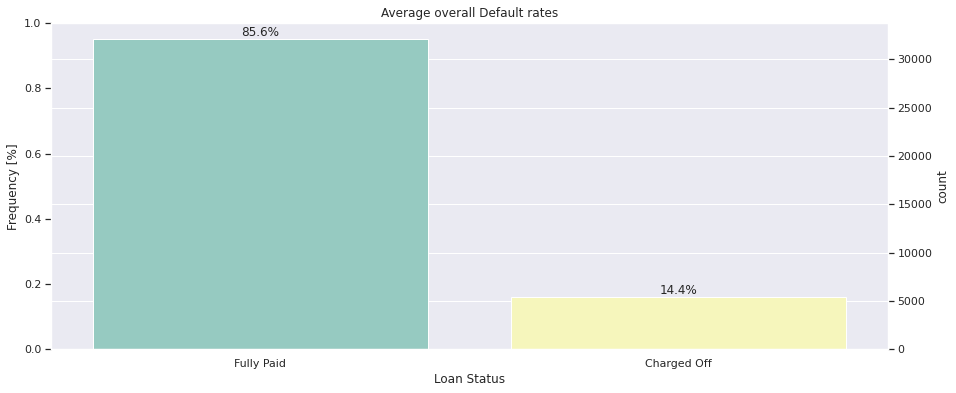

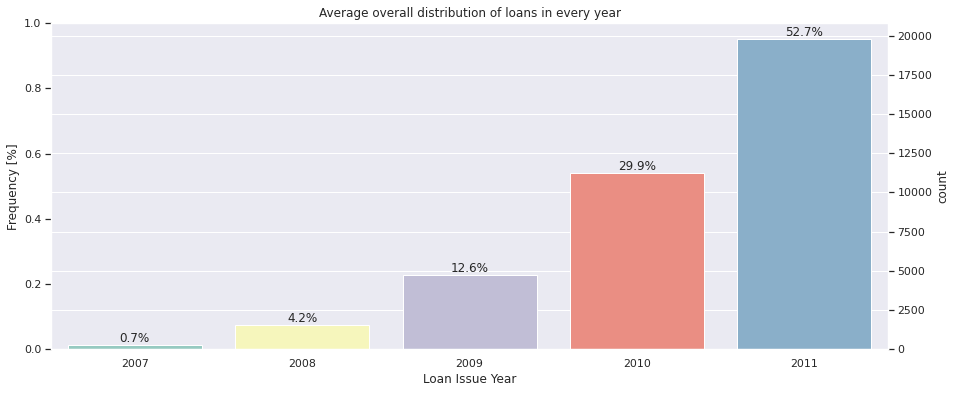

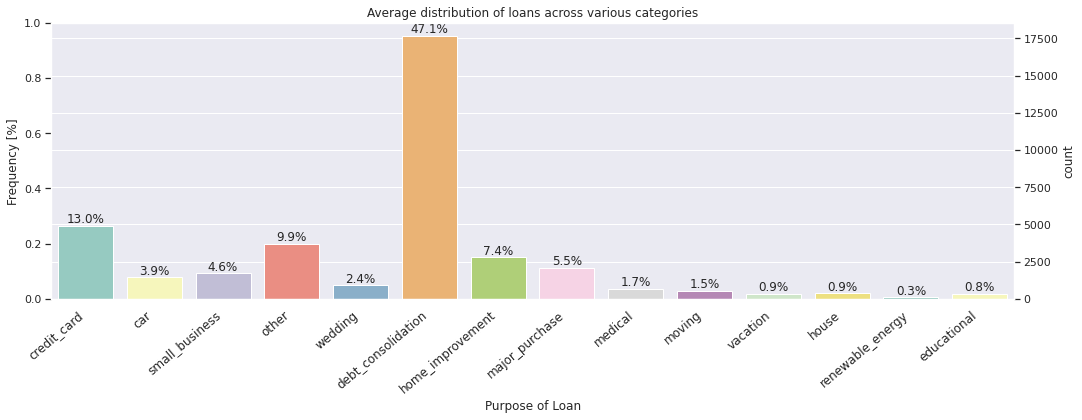

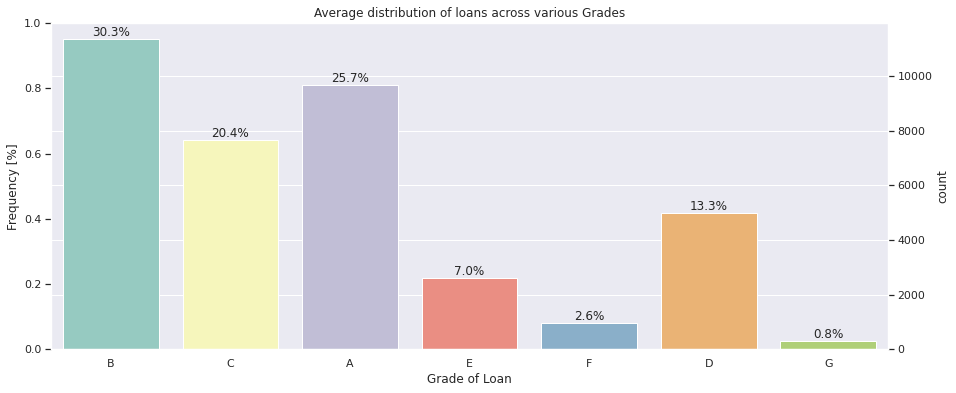

In [9]:
# Plotting average overall default rate

sns.set(style="darkgrid")
#ax = sns.countplot(x="loan_status", data=loans)
def plt_frequency(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6):
    ncount = len(loans)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3")
    plt.title(title)
    plt.xlabel(x_label)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)
    
plt_frequency("loan_status",loans,'Loan Status','Average overall Default rates')
plt_frequency("issue_year",loans,'Loan Issue Year','Average overall distribution of loans in every year')
plt_frequency("purpose",loans,'Purpose of Loan','Average distribution of loans across various categories',None,1)
plt_frequency("grade",loans,'Grade of Loan','Average distribution of loans across various Grades')

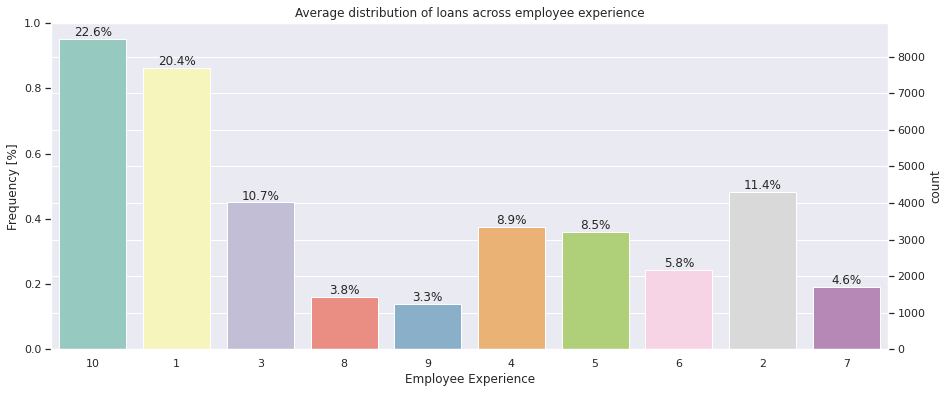

In [10]:
plt_frequency("emp_length",loans,'Employee Experience','Average distribution of loans across employee experience')


Insights from above plots
From above plots we can see that average default rate across all categories is 14.4%
The number of loan applicants is increasing every year
People with 1 year and 10 year experience are taking loans more frequently.
The following are the top 6 categories where maximum loan applications have been recieved and hence high is the defaulting probability in these categories.
For better analysis we will limit our analysis on top6 loan categories.
-debt_consolidation
-credit_card
-other
-home_improvement
-major_purchase
-small_business
Now we will filter the data for these categories and also we will derive new variables for our analysis
We will derive below variables for our analysis
Dti Range variable - Higher the dti ratio, lessen the chances of loan getting accepted.
Dti<10(low), dti>10 and dt<20 (medium) else ‘high’
Loan-to-income range variable - HIgher the ratio , more chances of defaulting.
l_t_ai<0.1(low), >0.1 and <0.2 (medium) , >0.2 (high)
Experience category
<3 years (junior) , between 3 - 7 years (senior) , >7 years (specialist)

In [30]:
# debt to income ratio
def dti_range_calculator(dti):
    if dti <= 10.00:
        return 'low'
    elif (dti >10.00 and dti <= 20.00):
        return 'medium'
    else:
        return 'high'
        
def loan_to_annual_income_range_calculator(l_t_ai):
    if l_t_ai <= 0.10:
        return 'low'
    elif (l_t_ai >0.10 and l_t_ai <= 0.20):
        return 'medium'
    else:
        return 'high'

def experience_level(exp):
    if exp <= 3:
        return 'Junior'
    elif (exp >3 and exp <= 7):
        return 'Senior'
    else:
        return 'Specialist'
    
category_list = ['debt_consolidation','credit_card','other','home_improvement','major_purchase','small_business']
loans = loans.query('purpose == @category_list')
loans['dti_range'] = loans['dti'].apply(lambda x : dti_range_calculator(x) )
loans['l_t_ai_range'] = loans['l_t_ai'].apply(lambda x : loan_to_annual_income_range_calculator(x) )
loans['exp_level'] = loans['emp_length'].apply(lambda x : experience_level(int(x)))
loans['int_rate_float'] = loans['int_rate'].apply(lambda x : float(x.replace('%','')))

Univarite segmented analysis on filtered data

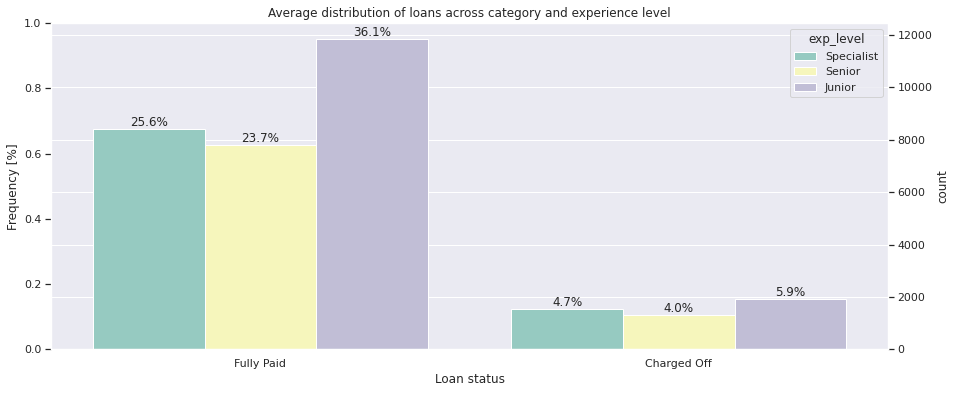

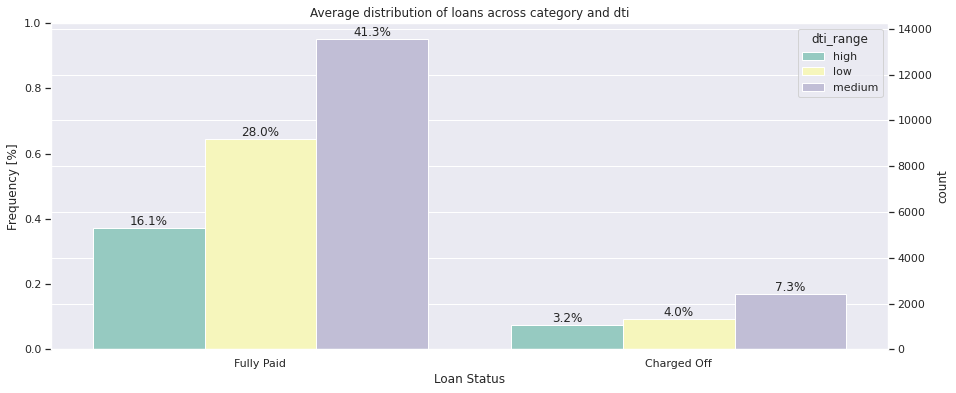

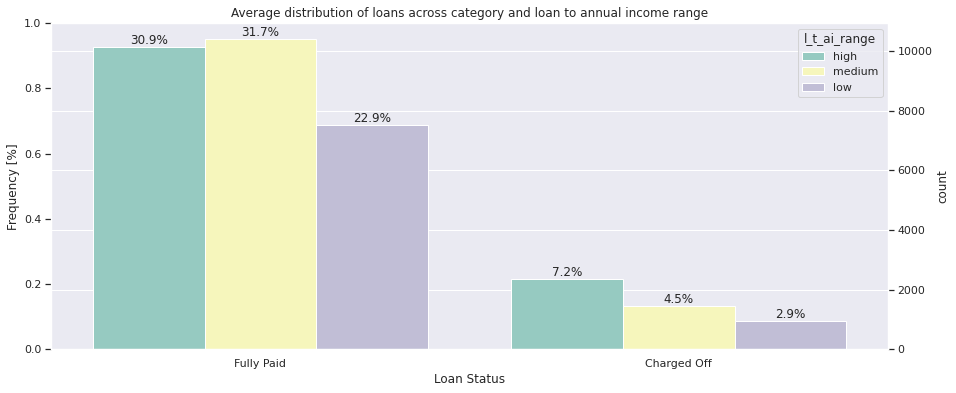

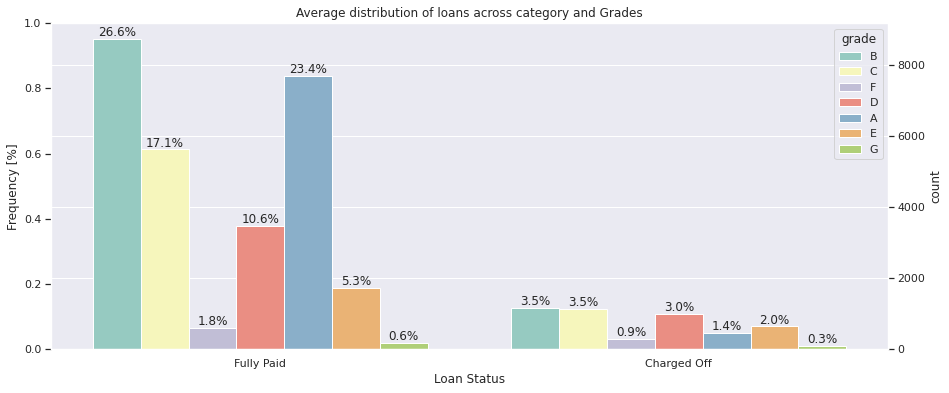

In [ ]:
plt_frequency("loan_status",loans,'Loan status','Average distribution of loans across category and experience level','exp_level')
plt_frequency("loan_status",loans,'Loan Status','Average distribution of loans across category and dti','dti_range')
plt_frequency("loan_status",loans,'Loan Status','Average distribution of loans across category and loan to annual income range','l_t_ai_range')
plt_frequency("loan_status",loans,'Loan Status','Average distribution of loans across category and Grades','grade')

From the above graphs we can see that people with less experience have high chance of default.
People lying in medium dti range have high chances of default
People who have high loan to annual income ratio are at high risk of defaulting.
Grades B,Cand D are at high probablity of defaulting.
Bivariate Analysis - Here we will see how house ownership and verified source of income affect out analysis and if they can give some insights about loan Defaulting
First we will clean the Verification Status column as Verified and Source Verified into one value as Verified and all other values as Not Verified.

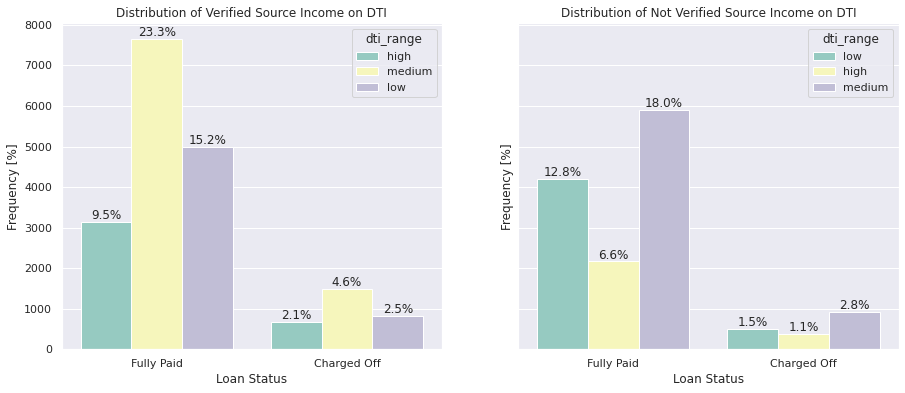

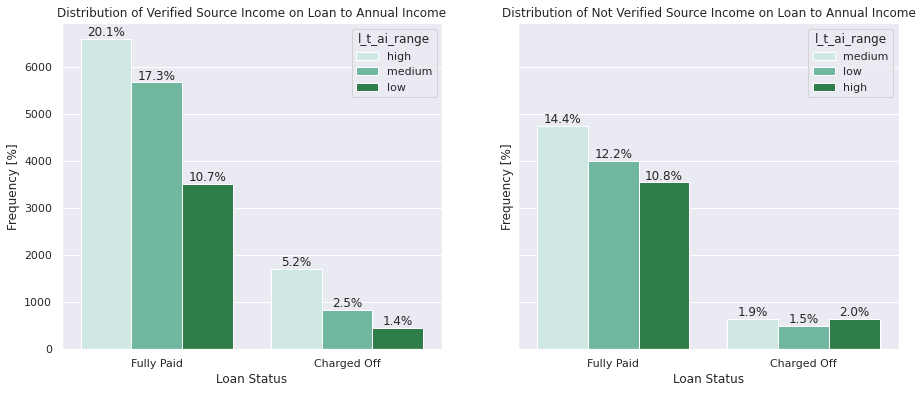

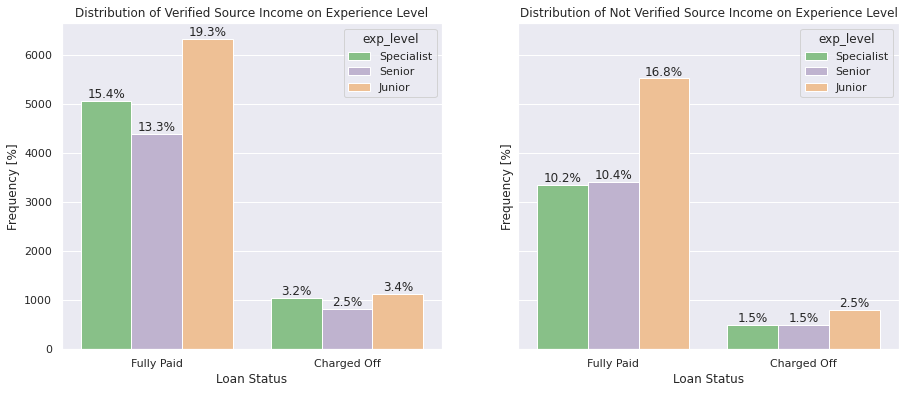

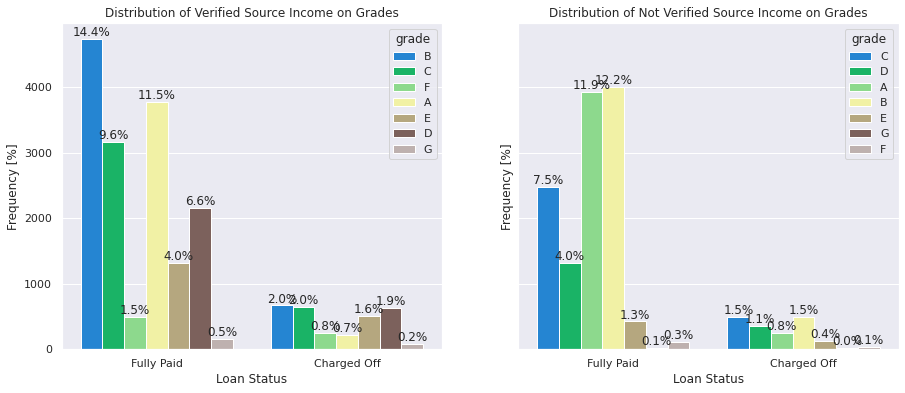

In [13]:
loans['verification_status']= loans['verification_status'].apply(lambda x :'Verified' if (x=='Verified' or x == 'Source Verified')  else 'Not Verified')

def plt_frequency_subplot(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=15,fig_size_y=6,axis=None):
    ncount = len(loans)
    dims = (fig_size_x,fig_size_y)
    plt.figure(figsize=dims)
    ax =sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set3",ax=axis)
    plt.title(title)
    plt.xlabel(x_label)

    
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    #ax2.grid(None)

def create_subplot(x_var,data_df,x_label,title,hue_var=None,palette_var='Dark2',rot_flag=0,axis=None):
    ncount = len(loans)
    if axis is None:
        axis= plt.gca()  
    bp = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette=palette_var,ax=axis)
    if(rot_flag==1):
        axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    axis.set_title(title)
    axis.set_xlabel(x_label)
    axis.set_ylabel('Frequency [%]')
    for p in axis.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        axis.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
    return bp

# make figure with subplots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loans[loans['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on DTI','dti_range','Set3',0, ax1)
create_subplot('loan_status',loans[loans['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on DTI','dti_range','Set3',0, ax2)   


#fig, axs = plt.subplots(ncols=2,figsize=(10,5))
#sns.countplot(x='loan_status', data=loans[loans['verification_status']=='Verified'],hue='dti_range',palette="Set3",ax=axs[0])
#sns.countplot(x='loan_status', data=loans[loans['verification_status']=='Not Verified'],hue='dti_range',palette="Set3",ax=axs[1])
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loans[loans['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Loan to Annual Income','l_t_ai_range','BuGn',0, ax1)
create_subplot('loan_status',loans[loans['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Loan to Annual Income','l_t_ai_range','BuGn',0, ax2)   

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loans[loans['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Experience Level','exp_level','Accent',0, ax1)
create_subplot('loan_status',loans[loans['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Experience Level','exp_level','Accent',0, ax2)   

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
create_subplot('loan_status',loans[loans['verification_status']=='Verified'],'Loan Status','Distribution of Verified Source Income on Grades','grade','terrain',0, ax1)
create_subplot('loan_status',loans[loans['verification_status']=='Not Verified'],'Loan Status','Distribution of Not Verified Source Income on Grades','grade','terrain',0, ax2)   


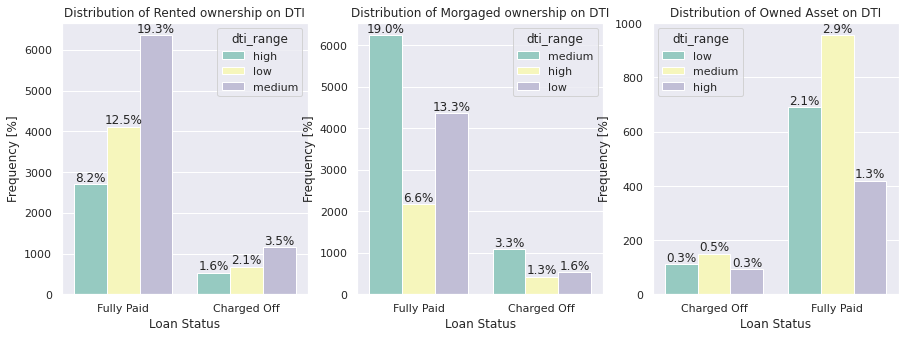

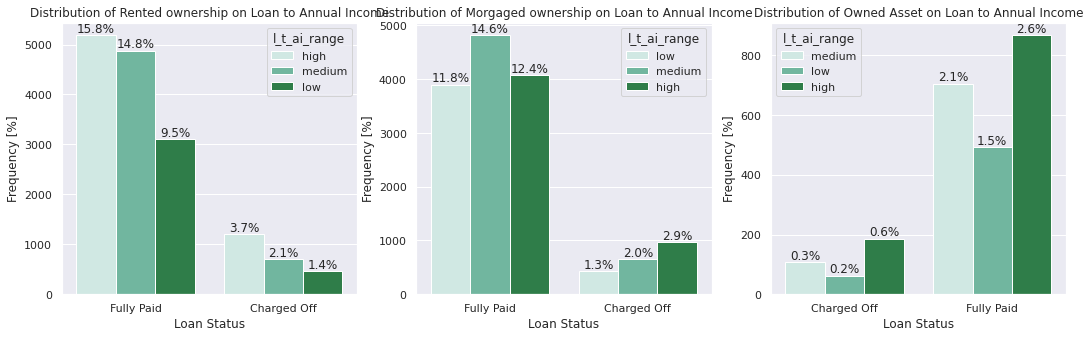

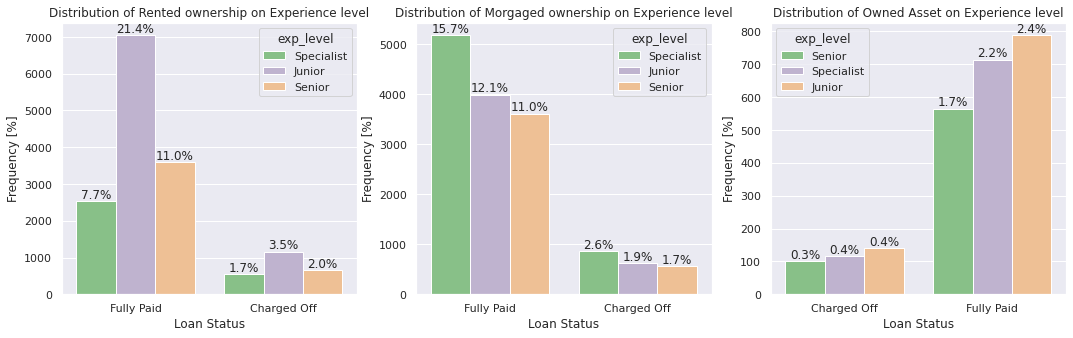

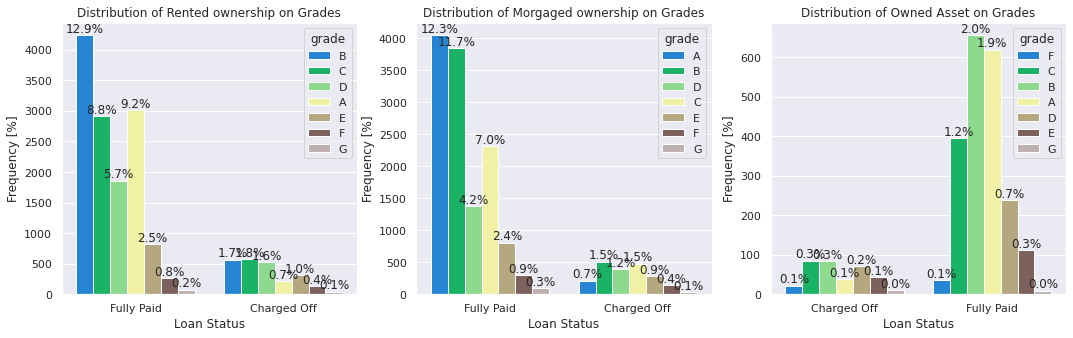

In [14]:
# make figure with subplots
#f, (ax1, ax2,ax3) = plt.subplots(1, 2,3, sharey=True, figsize=(15,6))
fig, axs = plt.subplots(ncols=3,figsize=(15,5))
create_subplot('loan_status',loans[loans['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on DTI','dti_range','Set3',0, axs[0])
create_subplot('loan_status',loans[loans['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on DTI','dti_range','Set3',0, axs[1])   
create_subplot('loan_status',loans[loans['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on DTI','dti_range','Set3',0, axs[2])   


fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',loans[loans['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Loan to Annual Income','l_t_ai_range','BuGn',0, axs[0])
create_subplot('loan_status',loans[loans['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Loan to Annual Income','l_t_ai_range','BuGn',0, axs[1])   
create_subplot('loan_status',loans[loans['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Loan to Annual Income','l_t_ai_range','BuGn',0, axs[2])   

fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',loans[loans['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Experience level','exp_level','Accent',0, axs[0])
create_subplot('loan_status',loans[loans['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Experience level','exp_level','Accent',0, axs[1])   
create_subplot('loan_status',loans[loans['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Experience level','exp_level','Accent',0, axs[2])   

fig, axs = plt.subplots(ncols=3,figsize=(18,5))
create_subplot('loan_status',loans[loans['home_ownership']=='RENT'],'Loan Status','Distribution of Rented ownership on Grades','grade','terrain',0, axs[0])
create_subplot('loan_status',loans[loans['home_ownership']=='MORTGAGE'],'Loan Status','Distribution of Morgaged ownership on Grades','grade','terrain',0, axs[1])   
create_subplot('loan_status',loans[loans['home_ownership']=='OWN'],'Loan Status','Distribution of Owned Asset on Grades','grade','terrain',0, axs[2])   


In [15]:
laons_corr_df = loans.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate_float','installment','emp_length','annual_inc','dti','l_t_ai']) 
cor = laons_corr_df.corr()
round(cor, 3)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate_float,installment,annual_inc,dti,l_t_ai
loan_amnt,1.000,0.981,0.935,0.306,0.928,0.258,0.057,0.601
funded_amnt,0.981,1.000,0.954,0.310,0.956,0.253,0.058,0.588
funded_amnt_inv,0.935,0.954,1.000,0.302,0.901,0.240,0.067,0.557
int_rate_float,0.306,0.310,0.302,1.000,0.280,0.048,0.110,0.210
installment,0.928,0.956,0.901,0.280,1.000,0.256,0.046,0.538
annual_inc,0.258,0.253,0.240,0.048,0.256,1.000,-0.132,-0.234
dti,0.057,0.058,0.067,0.110,0.046,-0.132,1.000,0.158
l_t_ai,0.601,0.588,0.557,0.210,0.538,-0.234,0.158,1.000


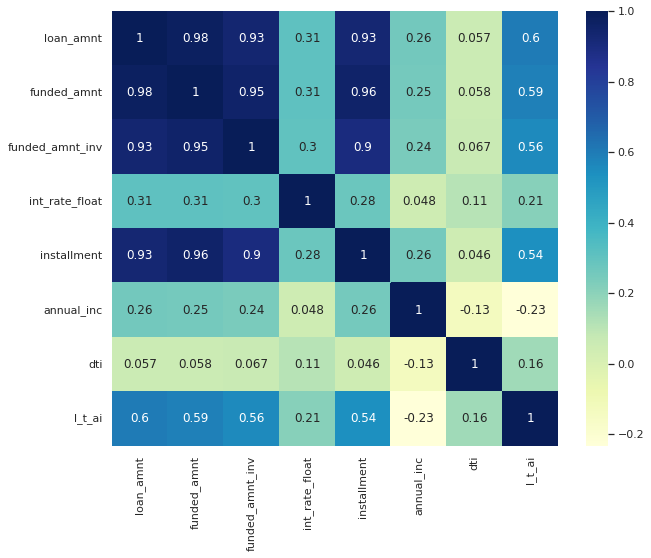

In [16]:
#Plotting Heat map to understand correlation visually
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The above plot is the analysis obtained
